In [ ]:
!wget https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true

--2022-11-06 21:55:45--  https://github.com/daniel-e/mnist_octave/blob/master/mnist.mat?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat [following]
--2022-11-06 21:55:45--  https://github.com/daniel-e/mnist_octave/raw/master/mnist.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat [following]
--2022-11-06 21:55:46--  https://raw.githubusercontent.com/daniel-e/mnist_octave/master/mnist.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [ ]:
import scipy.io as sio
data = sio.loadmat('mnist.mat?raw=true')
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017',
 '__version__': '1.0',
 '__globals__': [],
 'testX': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8),
 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8),
 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

Citations:

[1] https://stackoverflow.com/questions/18296755/python-max-function-using-key-and-lambda-expression

[2] https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-normalize-or-standardize-a-dataset-in-python.md

[3] https://python.plainenglish.io/two-ways-to-calculate-accuracy-of-two-arrays-47c2a960b301

[4] https://stackoverflow.com/questions/20927368/how-to-normalize-a-confusion-matrix

In [ ]:
import numpy as np

def dist(a,b):
  return np.sqrt(np.sum((a-b)**2))

#dist(np.array([0,0]),np.array([3,4]))

In [ ]:


#make function that calculates distance of one testing vector to multiple training vectors
def predict_Label(test_data,train_data,k):
  #get distance bw passed testing data and training data
  distances = [dist(test_data,t_data) for t_data in train_data]
  #create array of indices of sorted values(least to greatest)
  distances_sorted = np.argsort(distances)
  #create array of first k values of distances_sorted
  k_array = distances_sorted[:k]
  #retrieve the labels in training set using indicies in k_array
  k_labels = [training_label[0][i] for i in k_array]
  #get the count of each label in k_labels
  count_of_labels = {}
  for lbl in k_labels:
    count_of_labels[lbl] = k_labels.count(lbl)

  #majority occurence of keys in dictionary is predicted label
  pLabel =  str(max(count_of_labels, key=count_of_labels.get))#[1]

  return pLabel


Text(0, 0.5, 'Accuracy')

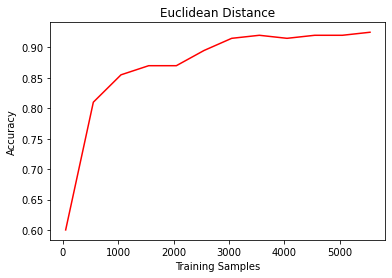

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix #[4]
#normalize testing & training data [2]
testing_data = (data['testX'] - np.min(data['testX'])) / (np.max(data['testX']) - np.min(data['testX']))
training_data = (data['trainX'] - np.min(data['trainX'])) / (np.max(data['trainX']) - np.min(data['trainX']))

testing_label = data['testY']
training_label = data['trainY']

#Figure 1: fix number of testing samples to 200; plot accuracies of predictions using 1000 to 5000 training images
testing_size = 200
actual = testing_label[0][:testing_size]
k=1
accuracies = []
t_sizes = []
for training_size in range(50,6000,500):
  predicted = np.zeros(testing_size)
  for i in range(testing_size):
    #populate predicted array
    predicted[i] = predict_Label(testing_data[i],training_data[:training_size],k)

  #get accuracy of prediction at current iteration [3]
  accuracy = np.sum(np.equal(actual,predicted))/len(actual)
  #save accuracy in array
  accuracies.append(accuracy)
  #save training sample size in array
  t_sizes.append(training_size)

#plot results
plt.plot(t_sizes,accuracies,'r-')
plt.title('Euclidean Distance')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')





Text(0, 0.5, 'Accuracy')

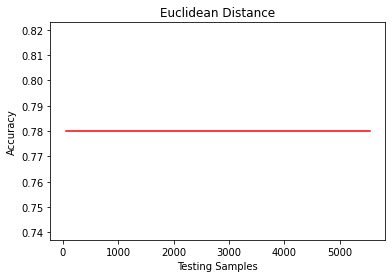

In [ ]:
#Figure 2: fix number of training samples to 500; plot accuracies of predictions using 1000 to 5000 testing images
training_size = 500

actual = testing_label[0][:5000]
k=1
accuracies=[]
test_sizes=[]
for testing_size in range(50,6000,500):
  predicted = np.zeros(5000)
  for i in range(5000):
    #populate predicted array
    predicted[i] = predict_Label(testing_data[i],training_data[:training_size],k)

  #get accuracy of predictions at current iteration
  accuracy = np.sum(np.equal(actual,predicted))/len(actual)
  #save accuracy
  accuracies.append(accuracy)
  #save testing sample size
  test_sizes.append(testing_size)

#plot results
plt.plot(t_sizes, accuracies,'r-')
plt.title('Euclidean Distance')
plt.xlabel('Testing Samples')
plt.ylabel('Accuracy')

In [ ]:
#Figure 3

#create confusion matrix [4]
cm = confusion_matrix(actual,predicted)
#normlize confusion matrix [4]
cm_norm = cm / cm.astype(np.float).sum(axis = 1)
print("Confusion Matrix: \n", cm_norm)

Confusion Matrix: 
 [[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.96363636 0.         0.         0.
  0.         0.02040816 0.025      0.        ]
 [0.         0.         0.         0.93333333 0.         0.02
  0.         0.04081633 0.         0.        ]
 [0.         0.01492537 0.         0.         0.94545455 0.
  0.         0.         0.         0.03703704]
 [0.         0.         0.         0.02222222 0.         0.98
  0.         0.         0.         0.        ]
 [0.02380952 0.         0.         0.         0.01818182 0.
  0.95348837 0.         0.         0.        ]
 [0.         0.         0.         0.         0.01818182 0.
  0.         0.97959184 0.         0.        ]
 [0.02380952 0.         0.         0.         0.         0.02
  0.         0.         0.95       0.        ]
 [0.       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [ ]:
#finding most optimal K value
testing_sample_size = 200
training_size = 5000

Ks = []
accuracies = []

actual = testing_label[0][:testing_sample_size]

for k in range(1,21):
  predicted = np.zeros(testing_sample_size)
  predicted = [int(predict_Label(testing_data[i], training_data[:training_size],k)) for i in range(testing_sample_size)]

  accuracy = np.sum(np.equal(actual,predicted))/len(actual)

  accuracies.append(accuracy)
  Ks.append(k)

for i in range(len(Ks)):
  print("K = {0} \t Accuracy = {1}".format(Ks[i],accuracies[i]))


K = 1 	 Accuracy = 0.92
K = 2 	 Accuracy = 0.92
K = 3 	 Accuracy = 0.95
K = 4 	 Accuracy = 0.935
K = 5 	 Accuracy = 0.95
K = 6 	 Accuracy = 0.945
K = 7 	 Accuracy = 0.945
K = 8 	 Accuracy = 0.95
K = 9 	 Accuracy = 0.955
K = 10 	 Accuracy = 0.945
K = 11 	 Accuracy = 0.94
K = 12 	 Accuracy = 0.925
K = 13 	 Accuracy = 0.935
K = 14 	 Accuracy = 0.935
K = 15 	 Accuracy = 0.935
K = 16 	 Accuracy = 0.925
K = 17 	 Accuracy = 0.935
K = 18 	 Accuracy = 0.92
K = 19 	 Accuracy = 0.92
K = 20 	 Accuracy = 0.92


In [ ]:
#experiment code

testing_data = data['testX']
testing_label = data['testY']
training_label = data['trainY']
training_data = data['trainX']

np.shape(testing_data)

index = 0

print("Expected Label of vector:",testing_label[0][index])
#get distance of single test sample to all training data
x = [dist(t_data,testing_data[index]) for t_data in training_data]
print("Shape of vector:",np.shape(x))
print("Values of vector:",x)
#sorted values of x from least to greatest by index
x_sorted = np.argsort(x)
print("Sorted indices of values in vector (least to greatest):", x_sorted)

#define K
K = 10
#make array with values up to Kth element of x_sorted
kth_array = x_sorted[:K]
print("Array of the first K = %s sorted indices:"%(K))
print(kth_array)

#retrieve the labels in training set using indicies in kth_array
k_labels = [training_label[0][i] for i in kth_array]
print("Kth labels:")
print(k_labels)

#get the count of each label in k_labels
count_of_labels={}
for lbl in k_labels:
  count_of_labels[lbl] = k_labels.count(lbl)

#majority occurence of keys in dictionary is predicted label
predicted_label = max(count_of_labels, key=count_of_labels.get)#[1]

print("Predicted Label:",predicted_label)



Expected Label of vector: 7
Shape of vector: (60000,)
Values of vector: [135.988970140964, 136.4148085803004, 135.04443713089407, 108.79797792238604, 132.32535660258014, 142.57278842752567, 118.06777714516353, 128.2458576329076, 117.983049630021, 127.43625857659192, 129.82295636750843, 120.63996021219504, 143.88537104236832, 141.12760183606892, 108.94035065117058, 120.5404496424333, 135.5912976558599, 130.98091464026353, 131.75355782672435, 129.9230541512937, 129.71892691508052, 142.96503068932626, 126.5029643921438, 116.69190203266035, 133.6637572418193, 141.02127499069067, 120.61094477699774, 130.6981254647518, 141.16656828017037, 123.38962679253066, 133.1164903383499, 131.42678570215435, 128.47957036042735, 127.5068625604128, 136.9634987870856, 131.76494222667878, 133.9589489358587, 144.86545481929085, 131.63206296339808, 132.18169313486644, 109.75882652433926, 131.15258289488622, 111.22499719037982, 123.83860464330176, 125.98412598418898, 123.5637487291479, 138.10141201305655, 107.

In [ ]:
#experiment code

#testing_data = data['testX']

#normalized
testing_data = (data['testX'] - np.min(data['testX'])) / (np.max(data['testX']) - np.min(data['testX']))

testing_label = data['testY']
training_label = data['trainY']
#training_data = data['trainX']

#normalized
training_data = (data['trainX'] - np.min(data['trainX'])) / (np.max(data['trainX']) - np.min(data['trainX']))



K = 1
testing_size = 500
#print("Expected:", testing_label[0][0])
#print("Actual:", predict_Label(testing_data[0],training_data,K))

#actual =  testing_label[0][:testing_size]
#predicted = np.zeros(testing_size)




#for i in range(testing_size):
  #predicted[i] = predict_Label(testing_data[i],training_data,K)


actual = testing_label[0][:testing_size]
predicted = [int(predict_Label(testing_data[i],training_data,K)) for i in range(testing_size)]

accuracy = np.sum(np.equal(actual,predicted))/len(actual)

print("Actual: ",actual)
print("Predicted: ",predicted)
print("Accuracy",accuracy)










Actual:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 4 4 2 4 1 9 5 7 7 2 8 2
 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 2 9 3 0 4 2 0 7 1 1 2 1
 5 3 3 9 7 8 6 5 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9 4 6 2 2 5 0 6 5 6 3
 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 8 2 4 5
 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0
 2 6 6 4 9 3 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2 7 5 8 9 6 1 8 4 1 2 5 9 1
 9 7 5 4 0 8 9 9

In [ ]:
#[print("K = {0} \t Accuracy = {1}".format(Ks[i],accuracies[i])) for i in range(len(Ks))]
